In [1]:
import tensorflow as tf
import pandas as pd
import os

In [2]:
os.chdir('C:\\Users\\JOS\\Documents\\Machine Learning')

In [3]:
df=pd.read_csv("IRIS.csv")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.describe(include='all')

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# To find outliers

In [6]:
def IQR_values(df,column_name):
    q1=df[column_name].quantile(0.25) #to set quantille of columns
    q2=df[column_name].quantile(0.50)
    q3=df[column_name].quantile(0.75)
    IQR=q3-q1 #to find IQR value
    low_limit=q1-1.5*IQR #setting low limit and upper limit
    upper_limit=q3+1.5*IQR
    return low_limit,upper_limit

outlier={}
for column in ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']:
    low_limit,upper_limit=IQR_values(df,column)
    outlier[column]=[low_limit,upper_limit]
outlier

{'sepal_length': [3.1499999999999986, 8.350000000000001],
 'sepal_width': [2.05, 4.05],
 'petal_length': [-3.649999999999999, 10.349999999999998],
 'petal_width': [-1.95, 4.05]}

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
outindx=[]
for i in ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']:
    df_outl=(df[i]>outlier[i][1])|(df[i]<outlier[i][0])
    x=df.loc[df_outl].index
    outindx.append(x)
outindx

[Int64Index([], dtype='int64'),
 Int64Index([15, 32, 33, 60], dtype='int64'),
 Int64Index([], dtype='int64'),
 Int64Index([], dtype='int64')]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# Replace outlier with mean

In [10]:
a=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
for i in range(len(a)):
    df.loc[outindx[i],a[i]]=df[a[i]].mean()
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# Min Max Scaling

In [12]:
df1=df.drop("species",axis=1)
df1

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [13]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()

In [15]:
x=scalar.fit_transform(df1)
df2=pd.DataFrame(x,columns=df1.columns)
df2

,sepal_length,sepal_width,petal_length,petal_width
0,0.222222,0.722222,0.067797,0.041667
1,0.166667,0.444444,0.067797,0.041667
2,0.111111,0.555556,0.050847,0.041667
3,0.083333,0.500000,0.084746,0.041667
4,0.194444,0.777778,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.444444,0.711864,0.916667
146,0.555556,0.166667,0.677966,0.750000
147,0.611111,0.444444,0.711864,0.791667
148,0.527778,0.666667,0.745763,0.916667


In [17]:
df.update(df2)
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,0.222222,0.722222,0.067797,0.041667,Iris-setosa
1,0.166667,0.444444,0.067797,0.041667,Iris-setosa
2,0.111111,0.555556,0.050847,0.041667,Iris-setosa
3,0.083333,0.500000,0.084746,0.041667,Iris-setosa
4,0.194444,0.777778,0.067797,0.041667,Iris-setosa
...,...,...,...,...,...
145,0.666667,0.444444,0.711864,0.916667,Iris-virginica
146,0.555556,0.166667,0.677966,0.750000,Iris-virginica
147,0.611111,0.444444,0.711864,0.791667,Iris-virginica
148,0.527778,0.666667,0.745763,0.916667,Iris-virginica


# Label Encoding

In [18]:
from sklearn.preprocessing import LabelEncoder
lenc=LabelEncoder()
a=['species']
df[a] = df[a].apply(lenc.fit_transform)
df3=df[a]
df.update(df3)
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,0.222222,0.722222,0.067797,0.041667,0
1,0.166667,0.444444,0.067797,0.041667,0
2,0.111111,0.555556,0.050847,0.041667,0
3,0.083333,0.500000,0.084746,0.041667,0
4,0.194444,0.777778,0.067797,0.041667,0
...,...,...,...,...,...
145,0.666667,0.444444,0.711864,0.916667,2
146,0.555556,0.166667,0.677966,0.750000,2
147,0.611111,0.444444,0.711864,0.791667,2
148,0.527778,0.666667,0.745763,0.916667,2


# Modelling

In [22]:
x=df.drop('species',axis=1)
y=df['species']
x

,sepal_length,sepal_width,petal_length,petal_width
0,0.222222,0.722222,0.067797,0.041667
1,0.166667,0.444444,0.067797,0.041667
2,0.111111,0.555556,0.050847,0.041667
3,0.083333,0.500000,0.084746,0.041667
4,0.194444,0.777778,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.444444,0.711864,0.916667
146,0.555556,0.166667,0.677966,0.750000
147,0.611111,0.444444,0.711864,0.791667
148,0.527778,0.666667,0.745763,0.916667


In [23]:
x=x.to_numpy()
y=y.to_numpy()
x

array([[0.22222222, 0.72222222, 0.06779661, 0.04166667],
       [0.16666667, 0.44444444, 0.06779661, 0.04166667],
       [0.11111111, 0.55555556, 0.05084746, 0.04166667],
       [0.08333333, 0.5       , 0.08474576, 0.04166667],
       [0.19444444, 0.77777778, 0.06779661, 0.04166667],
       [0.30555556, 0.94444444, 0.11864407, 0.125     ],
       [0.08333333, 0.66666667, 0.06779661, 0.08333333],
       [0.19444444, 0.66666667, 0.08474576, 0.04166667],
       [0.02777778, 0.38888889, 0.06779661, 0.04166667],
       [0.16666667, 0.5       , 0.08474576, 0.        ],
       [0.30555556, 0.83333333, 0.08474576, 0.04166667],
       [0.13888889, 0.66666667, 0.10169492, 0.04166667],
       [0.13888889, 0.44444444, 0.06779661, 0.        ],
       [0.        , 0.44444444, 0.01694915, 0.        ],
       [0.41666667, 1.        , 0.03389831, 0.04166667],
       [0.38888889, 0.47444444, 0.08474576, 0.125     ],
       [0.30555556, 0.94444444, 0.05084746, 0.125     ],
       [0.22222222, 0.72222222,

In [25]:
y=tf.keras.utils.to_categorical(y,3)
y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [27]:
#create model
from tensorflow import keras

#create sequential model in keras
model=tf.keras.models.Sequential()

#add 1st input layer
model.add(keras.layers.Dense(128, #no.of nodes
                             input_shape=(4,), #number of input variable
                             activation='relu')) #activation function

#add hidden layer
model.add(keras.layers.Dense(128, activation='relu'))

#add output layer
model.add(keras.layers.Dense(3, activation='softmax'))

#compile the model with loss and metrics
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               640       
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 3)                 387       
                                                                 
Total params: 17,539
Trainable params: 17,539
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
6/6 [==============================] - 2s 116ms/step - loss: 1.0920 - accuracy: 0.3958 - val_loss: 1.0204 - val_accuracy: 0.5000
Epoch 2/10
6/6 [==============================] - 0s 17ms/step - loss: 0.9741 - accuracy: 0.6875 - val_loss: 0.9317 - val_accuracy: 0.5000
Epoch 3/10
6/6 [==============================] - 0s 17ms/step - loss: 0.8873 - accuracy: 0.7188 - val_loss: 0.8416 - val_accuracy: 0.7917
Epoch 4/10
6/6 [==============================] - 0s 17ms/step - loss: 0.8001 - accuracy: 0.8333 - val_loss: 0.7605 - val_accuracy: 0.7083
Epoch 5/10
6/6 [==============================] - 0s 22ms/step - loss: 0.7279 - accuracy: 0.7500 - val_loss: 0.7034 - val_accuracy: 0.9583
Epoch 6/10
6/6 [==============================] - 0s 18ms/step - loss: 0.6543 - accuracy: 0.7083 - val_loss: 0.6744 - val_accuracy: 0.6250
Epoch 7/10
6/6 [==============================] - 0s 19ms/step - loss: 0.6012 - accuracy: 0.7396 - val_loss: 0.6483 - val_accuracy: 0.5000
Epoch 8/10
6/6 [==========

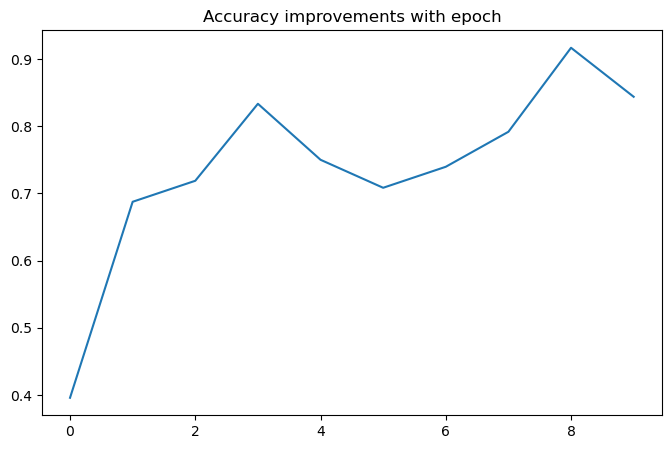

1/1 [==============================] - 0s 53ms/step - loss: 0.4730 - accuracy: 0.9333


[0.4729829728603363, 0.9333333373069763]

In [28]:
import matplotlib.pyplot as plt
import pandas as pd

#fit model
history=model.fit(x_train, y_train, batch_size=16, epochs=10, verbose=1, validation_split=0.2)
pd.DataFrame(history.history)['accuracy'].plot(figsize=(8,5))
plt.title('Accuracy improvements with epoch')
plt.show()
model.evaluate(x_test,y_test)

In [31]:
# to save model
model.save('iris_save')

#to load model
loaded_model=keras.models.load_model('iris_save')

#print model summary
loaded_model.summary()

INFO:tensorflow:Assets written to: iris_save\assets


INFO:tensorflow:Assets written to: iris_save\assets


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               640       
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 3)                 387       
                                                                 
Total params: 17,539
Trainable params: 17,539
Non-trainable params: 0
_________________________________________________________________


# Predictions

In [35]:
#raw_input
prediction_input=[[78,39,34,78]]

#scale the prediction_input
scaled_input=scalar.fit_transform(prediction_input)

#predict the output
raw_prediction=model.predict(scaled_input)

print("Raw predict output (probabilities): ",raw_prediction)

#find the prediction
import numpy as np
prediction=np.argmax(raw_prediction) #to get index of highest probability
print("Prediction is ",lenc.inverse_transform([prediction]))

1/1 [==============================] - 0s 66ms/step
Raw predict output (probabilities):  [[0.54454136 0.2676727  0.18778598]]
Prediction is  ['Iris-setosa']
